In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook

%matplotlib inline

In [3]:
# Assigning path
path = r'C:\Users\Shruthi\Desktop\immo_data.csv'

In [4]:
# Importing data
df= pd.read_csv(os.path.join(path, 'immo_data.csv'))

Data cleaning

In [5]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [6]:
df.head(20)

regio1  serviceCharge                     heatingType  \
0   Nordrhein_Westfalen         245.00                 central_heating   
1       Rheinland_Pfalz         134.00  self_contained_central_heating   
2               Sachsen         255.00                   floor_heating   
3               Sachsen          58.15                district_heating   
4                Bremen         138.00  self_contained_central_heating   
5    Schleswig_Holstein         142.00                     gas_heating   
6               Sachsen          70.00  self_contained_central_heating   
7                Bremen          88.00                 central_heating   
8     Baden_Württemberg         110.00                     oil_heating   
9   Nordrhein_Westfalen          95.00  self_contained_central_heating   
10              Sachsen          88.00                             NaN   
11              Sachsen         155.00                 central_heating   
12      Rheinland_Pfalz         270.00                     oil_heating   
13  Nordrhein_Westfalen         200.00                 central_heating   
14  Nordrhein_Westfalen         215.00                     gas_heating   
15            Thüringen          80.00                district_heating   
16               Hessen         220.00                     oil_heating   
17              Sachsen          50.00                 central_heating   
18  Nordrhein_Westfalen         121.00                 central_heating   
19        Niedersachsen         290.00                district_heating   

   telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0   ONE_YEAR_FREE                       NaN       False    False   
1   ONE_YEAR_FREE                       NaN       False     True   
2   ONE_YEAR_FREE                      10.0        True     True   
3   ONE_YEAR_FREE                       NaN       False     True   
4             NaN                       NaN       False     True   
5            NONE                       NaN       False     True   
6   ONE_YEAR_FREE                      10.0       False    False   
7   ONE_YEAR_FREE                      10.0       False     True   
8   ONE_YEAR_FREE                       NaN       False    False   
9   ONE_YEAR_FREE                       NaN       False    False   
10  ONE_YEAR_FREE                       NaN       False     True   
11  ONE_YEAR_FREE                      10.0       False    False   
12           NONE                       NaN       False    False   
13  ONE_YEAR_FREE                       NaN       False    False   
14  ONE_YEAR_FREE                      10.0        True     True   
15  ONE_YEAR_FREE                      10.0       False     True   
16  ONE_YEAR_FREE                       NaN       False     True   
17  ONE_YEAR_FREE                       NaN       False    False   
18  ONE_YEAR_FREE                       NaN       False     True   
19  ONE_YEAR_FREE                       NaN       False     True   

    picturecount  pricetrend  telekomUploadSpeed  ...  \
0              6        4.62                10.0  ...   
1              8        3.47                10.0  ...   
2              8        2.72                 2.4  ...   
3              9        1.53                40.0  ...   
4             19        2.46                 NaN  ...   
5              5        4.48                 2.4  ...   
6              9        1.01                 2.4  ...   
7              5        1.89                 2.4  ...   
8              5        3.77                40.0  ...   
9              7        1.92                40.0  ...   
10            11        0.21                40.0  ...   
11             9        0.98                 2.4  ...   
12             4        2.77                 2.4  ...   
13             3        3.45                40.0  ...   
14            12        3.76                 2.4  ...   
15             5        1.67                 2.4  ...   
16            17        3.85                40.0  ...   
17     

In [7]:
df.shape

(268850, 49)

In [8]:
# Renaming columns
df1= df.rename(columns = {'regio1': 'State', 'serviceCharge': 'Service_charge', 'pricetrend': 'Price_trend', 'telekomUploadSpeed':'Internet_speed', 'totalRent':'Total_rent', 'yearConstructed':'Construction_year',  'baseRent':'Base_rent', 'livingSpace':'Size',  'noRooms':'No_of_Rooms', 'regio3':'City', 'heatingCosts':'Heating_costs', 'date': 'Date_posted'})

In [9]:
# Make a df with all required variables
df2 = df1[['State', 'Service_charge', 'Price_trend', 'Internet_speed','Base_rent', 'Total_rent', 'Construction_year', 'Size', 'No_of_Rooms', 'City', 'Heating_costs', 'Date_posted']]

In [10]:
# Check for missing values
df2.isnull().sum()

State                     0
Service_charge         6909
Price_trend            1832
Internet_speed        33358
Base_rent                 0
Total_rent            40517
Construction_year     57045
Size                      0
No_of_Rooms               0
City                      0
Heating_costs        183332
Date_posted               0
dtype: int64

In [11]:
df2.head()

State  Service_charge  Price_trend  Internet_speed  \
0  Nordrhein_Westfalen          245.00         4.62            10.0   
1      Rheinland_Pfalz          134.00         3.47            10.0   
2              Sachsen          255.00         2.72             2.4   
3              Sachsen           58.15         1.53            40.0   
4               Bremen          138.00         2.46             NaN   

   Base_rent  Total_rent  Construction_year   Size  No_of_Rooms  \
0      595.0       840.0             1965.0  86.00          4.0   
1      800.0         NaN             1871.0  89.00          3.0   
2      965.0      1300.0             2019.0  83.80          3.0   
3      343.0         NaN             1964.0  58.15          3.0   
4      765.0       903.0             1950.0  84.97          3.0   

                         City  Heating_costs Date_posted  
0                     Schüren            NaN       May19  
1              Böhl_Iggelheim            NaN       May19  
2  Äußere_Neustadt_Antonstadt            NaN       Oct19  
3                    Freiberg          87.23       May19  
4           Neu_Schwachhausen            NaN       Feb20

In [12]:
# Impute missing values with mean
df2['Price_trend'].fillna(df2['Price_trend'].mean(), inplace=True)
df2['Total_rent'].fillna(df2['Total_rent'].mean(), inplace=True)
df2['Construction_year'].fillna(df2['Construction_year'].mean(), inplace=True)
df2['Service_charge'].fillna(df2['Service_charge'].mean(), inplace=True)
df2['Internet_speed'].fillna(df2['Internet_speed'].mean(), inplace=True)
df2['Heating_costs'].fillna(df2['Heating_costs'].mean(), inplace=True)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_11656\51476277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price_trend'].fillna(df2['Price_trend'].mean(), inplace=True)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_11656\51476277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_rent'].fillna(df2['Total_rent'].mean(), inplace=True)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_11656\51476277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [13]:
# Last check for NaN
df2.isnull().sum()

State                0
Service_charge       0
Price_trend          0
Internet_speed       0
Base_rent            0
Total_rent           0
Construction_year    0
Size                 0
No_of_Rooms          0
City                 0
Heating_costs        0
Date_posted          0
dtype: int64

In [14]:
# Check for duplicates
dups = df2.duplicated()

In [15]:
dups.shape

(268850,)

<Axes: xlabel='Price_trend', ylabel='Count'>

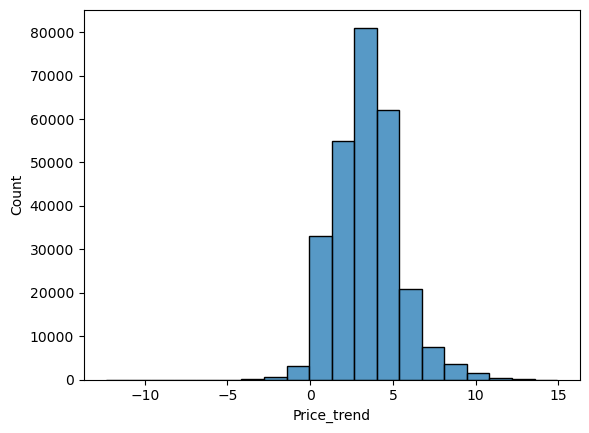

In [16]:
# Extreme values checks
sns.histplot(df2['Price_trend'], bins=20)

In [17]:
df2.columns

Index(['State', 'Service_charge', 'Price_trend', 'Internet_speed', 'Base_rent',
       'Total_rent', 'Construction_year', 'Size', 'No_of_Rooms', 'City',
       'Heating_costs', 'Date_posted'],
      dtype='object')

3. Data prep for regression analysis

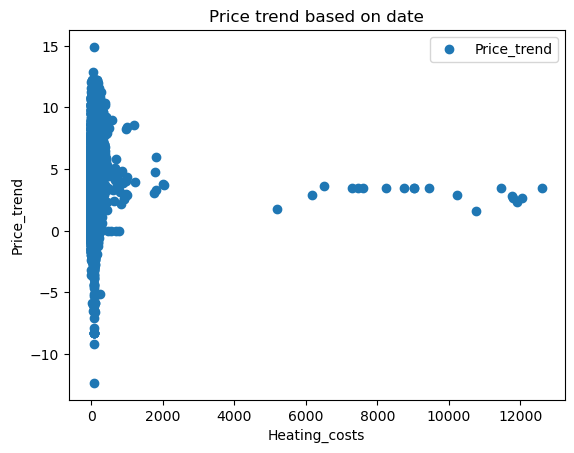

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df2.plot(x = 'Heating_costs', y='Price_trend',style='o') 
plt.title('Price trend based on date')  
plt.xlabel('Heating_costs')  
plt.ylabel('Price_trend')  
plt.show()

# Hypothesis
Lesser the heating costs, higher the price trend

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df2['Heating_costs'].values.reshape(-1,1)
y = df2['Price_trend'].values.reshape(-1,1)

In [20]:
X

array([[76.99086578],
       [76.99086578],
       [76.99086578],
       ...,
       [76.99086578],
       [40.        ],
       [76.99086578]])

In [21]:
y

array([[4.62],
       [3.47],
       [2.72],
       ...,
       [2.9 ],
       [4.39],
       [5.  ]])

In [22]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Regression analysis

In [23]:
# Create a regression object
regression = LinearRegression() 

In [24]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

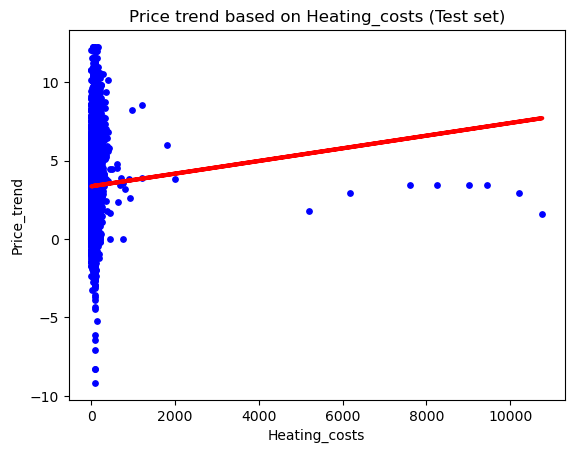

In [26]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price trend based on Heating_costs (Test set)')
plot_test.xlabel('Heating_costs')
plot_test.ylabel('Price_trend')
plot_test.show()

Here, we can clearly see that most of the datapoints are not covered by the regression line. In other words, we can say that even when the heating costs are high, the price trend remains to be low, which contradicts the hypothesis.

In [27]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [28]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00040353]]
Mean squared error:  3.7825145013823342
R2 score:  0.00013311073768318415


In [29]:
y_predicted

array([[3.38288106],
       [3.4111281 ],
       [3.39377266],
       ...,
       [3.39377266],
       [3.39377635],
       [3.40305752]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     1.93   3.382881
1     4.72   3.411128
2     5.51   3.393773
3     4.11   3.379653
4     1.90   3.392768
5     0.74   3.398215
6     3.45   3.393773
7     3.08   3.393773
8     1.52   3.393773
9     0.93   3.393773
10    4.42   3.397408
11    3.74   3.415163
12    2.79   3.394987
13    1.69   3.393773
14    1.28   3.393773
15    3.85   3.393773
16    4.77   3.393773
17    3.57   3.393773
18    0.19   3.393773
19    2.79   3.393773
20    3.32   3.392703
21    2.22   3.382881
22    4.79   3.393773
23    5.05   3.393773
24    4.69   3.393773
25    9.10   3.377554
26    3.89   3.393773
27    1.82   3.393773
28    1.79   3.393773
29    3.09   3.393773

Compare how the regression fits the training set

In [31]:
# Predicting x_train
y_predicted_train = regression.predict(X_train) 

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00040353]]
Mean squared error:  3.85527899778891
R2 score:  0.00027978559598795805


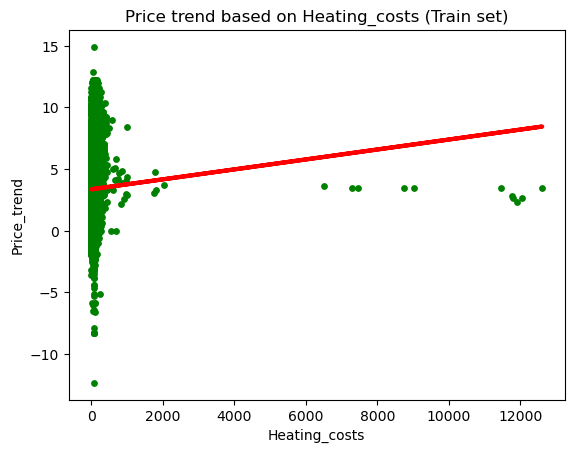

In [34]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price trend based on Heating_costs (Train set)')
plot_test.xlabel('Heating_costs')
plot_test.ylabel('Price_trend')
plot_test.show()

# Summary based on analysis
Based on the model R2 score, we see that this is not the best model. Hence, I can clearly say that the hypothesis can be rejected. As there is no linear regression, which implies that there are other factors which are influencing the price trend. Also, the price trend seems to be low even when the heating costs are higher. 